##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Functional API

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/guide/keras/functional"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/snapshot-keras/site/en/guide/keras/functional.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/keras-team/keras-io/blob/master/guides/functional_api.py"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/guide/keras/functional.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

## Setup

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Introduction

The Keras *functional API* is a way to create models that are more flexible
than the `tf.keras.Sequential` API. The functional API can handle models
with non-linear topology, shared layers, and even multiple inputs or outputs.

The main idea is that a deep learning model is usually
a directed acyclic graph (DAG) of layers.
So the functional API is a way to build *graphs of layers*.

Consider the following model:


Keras 함수형 API는 tf.keras.Sequential API보다 더 유연한 모델을 생성하는 방법입니다. 함수형 API는 비선형 토폴로지, 공유 레이어, 심지어 여러 입력 또는 출력이 있는 모델을 처리할 수 있습니다.
주요 개념은 딥 러닝 모델은 일반적으로 layers에 대한 DAG(directed acyclic graph)라는 것입니다. 따라서 함수형 API는 레이어의 그래프를 작성하는 방법입니다.

다음 모델을 고려하십시오.

```
(input: 784-dimensional vectors)
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (64 units, relu activation)]
       ↧
[Dense (10 units, softmax activation)]
       ↧
(output: logits of a probability distribution over 10 classes)
```

This is a basic graph with three layers.
To build this model using the functional API, start by creating an input node:

이 모델은 세 개의 레이어가 있는 기본 그래프입니다. 함수형 API를 사용하여 이 모델을 빌드하려면 먼저 입력 노드를 작성하세요.

> directed acyclic graph : 유향 비순환 그래프

In [ ]:
inputs = keras.Input(shape=(784,))    # mnist grayscale 28* 28

The shape of the data is set as a 784-dimensional vector.
The batch size is always omitted since only the shape of each sample is specified.

If, for example, you have an image input with a shape of `(32, 32, 3)`,
you would use:

데이터의 모양은 784 차원 벡터로 설정됩니다. 각 샘플의 shape만 지정되므로 batch size는 항상 생략됩니다.

예를 들어 `(32, 32, 3)` shape의 이미지 입력이있는 경우 다음을 사용합니다.

In [ ]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

The `inputs` that is returned contains information about the shape and `dtype`
of the input data that you feed to your model.
Here's the shape:

리턴되는 `inputs` 에는 모델에 공급하는 입력 데이터의 모양 및 `dtype` 에 대한 정보가 포함됩니다. 모양은 다음과 같습니다.

In [ ]:
inputs.shape

TensorShape([None, 784])

Here's the dtype:

In [ ]:
inputs.dtype

tf.float32

You create a new node in the graph of layers by calling a layer on this `inputs`
object:

In [ ]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

The "layer call" action is like drawing an arrow from "inputs" to this layer
you created.
You're "passing" the inputs to the `dense` layer, and you get `x` as the output.

Let's add a few more layers to the graph of layers:

"layer call" 동작은 "입력"에서 생성된 레이어로 화살표를 그리는 것과 같습니다. 입력을 `dense` 레이어로 "전달"하고 `x`를 출력으로 가져옵니다.

레이어 그래프에 레이어를 몇 개 레이어를 더 추가해 보겠습니다.

In [ ]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

At this point, you can create a `Model` by specifying its inputs and outputs
in the graph of layers:

이 시점에서 레이어 그래프에서 입력 및 출력을 지정하여 `Model`을 작성할 수 있습니다.

In [ ]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

Let's check out what the model summary looks like:

In [ ]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


You can also plot the model as a graph:

모델을 그래프로 플롯 할 수도 있습니다.

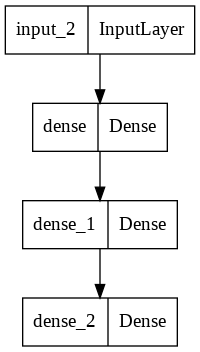

In [ ]:
keras.utils.plot_model(model, "my_first_model.png")

And, optionally, display the input and output shapes of each layer
in the plotted graph:

그리고 선택적으로 플롯 된 그래프에 각 레이어의 입력 및 출력 모양을 표시합니다.

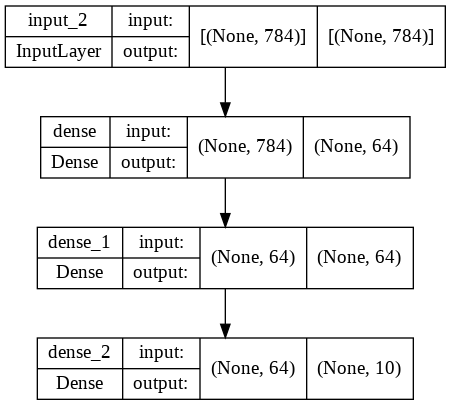

In [ ]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

This figure and the code are almost identical. In the code version,
the connection arrows are replaced by the call operation.

A "graph of layers" is an intuitive mental image for a deep learning model,
and the functional API is a way to create models that closely mirrors this.

이 그림과 코드는 거의 동일합니다. 코드 버전에서 연결 화살표는 호출 작업으로 대체됩니다.

"계층 그래프"는 딥 러닝 모델을위한 직관적 인 정신 이미지이며 함수형 API는이를 밀접하게 반영하는 모델을 만드는 방법입니다.

## Training, evaluation, and inference

Training, evaluation, and inference work exactly in the same way for models
built using the functional API as for `Sequential` models.

The `Model` class offers a built-in training loop (the `fit()` method)
and a built-in evaluation loop (the `evaluate()` method). Note
that you can easily [customize these loops](https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit/)
to implement training routines beyond supervised learning
(e.g. [GANs](/examples/generative/dcgan_overriding_train_step/)).

Here, load the MNIST image data, reshape it into vectors,
fit the model on the data (while monitoring performance on a validation split),
then evaluate the model on the test data:

교육, 평가 및 추론

Training, evaluation,그리고 inference은 `Sequential` 모델과 같이 functional API를 사용하여 빌드된 모델에 대해 같은 방식으로 작동합니다.

`Model` 클래스는 내장 훈련 루프(`fit()` 메서드)와 내장 평가 루프(`evaluate()` 메서드)를 제공합니다. [이러한 루프를 쉽게 사용자 정의](https://www.tensorflow.org/guide/keras/customizing_what_happens_in_fit/)하여 지도 학습(예: [GAN](/examples/generative/dcgan_overriding_train_step/)) 이상의 학습 루틴을 구현할 수 있습니다.

여기에서 MNIST 이미지 데이터를로드하고 벡터로 재구성하고 데이터에 모델을 맞추고 (유효성 분할에서 성능을 모니터링하는 동안) 테스트 데이터에서 모델을 평가하십시오.

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)


11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [ ]:
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

#BinaryAccuracy,  label값이 0,1일때
#CategoricalAccuracy  one hot incording ,
#SparseCategoricalAccuracy  label값이 0,1,2인 정수일때


model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),    # 마지막 layer의 값 =logits
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)   # validation_split : train set에서 20%를 validation data로 쓰겠다는것 60000*0.8/64=750

750/750 [==============================] - 4s 4ms/step - loss: 0.3367 - accuracy: 0.9048 - val_loss: 0.1873 - val_accuracy: 0.9438
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1561 - accuracy: 0.9536 - val_loss: 0.1379 - val_accuracy: 0.9596
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1156 - accuracy: 0.9662 - val_loss: 0.1252 - val_accuracy: 0.9625
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0912 - accuracy: 0.9720 - val_loss: 0.1055 - val_accuracy: 0.9695
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0764 - accuracy: 0.9778 - val_loss: 0.1105 - val_accuracy: 0.9702
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0643 - accuracy: 0.9803 - val_loss: 0.1101 - val_accuracy: 0.9714
Epoch 7/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0564 - accuracy: 0.9832 - val_loss: 0.1113 - val_accuracy: 0.9722
Epoch 8/10
750/75

> step : parameter를 update할때 사용

> 한번의 epoch끝날때마다 성능평가한다

> 한step당 계산됨 =>mini batch

In [ ]:
test_scores = model.evaluate(x_test, y_test, verbose=2)   
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

313/313 - 0s - loss: 0.1077 - accuracy: 0.9723 - 416ms/epoch - 1ms/step
Test loss: 0.10773439705371857
Test accuracy: 0.9722999930381775


For further reading, see the [training and evaluation](https://www.tensorflow.org/guide/keras/train_and_evaluate/) guide.

## Save and serialize

Saving the model and serialization work the same way for models built using
the functional API as they do for `Sequential` models. The standard way
to save a functional model is to call `model.save()`
to save the entire model as a single file. You can later recreate the same model
from this file, even if the code that built the model is no longer available.

This saved file includes the:
- model architecture
- model weight values (that were learned during training)
- model training config, if any (as passed to `compile`)
- optimizer and its state, if any (to restart training where you left off)

저장 및 직렬화

모델 저장 및 직렬화는 `Sequential` 모델과 같이 함수형 API를 사용하여 빌드된 모델에 대해 같은 방식으로 작동합니다. 함수형 모델을 저장하는 표준 방법은 `model.save()`를 호출하여 전체 모델을 단일 파일로 저장하는 것입니다. 모델을 빌드한 코드를 더 이상 사용할 수 없는 경우에도 나중에 이 파일에서 같은 모델을 다시 작성할 수 있습니다.

저장된 이 파일에는 다음이 포함됩니다.

- 모델 아키텍처
- 모델 중량 값 (훈련 중 학습 된 값)
- 모델 훈련 구성(있는 경우, `compile`로 전달)
- 옵티마이저 및 상태(있는 경우, 중단한 곳에서 훈련을 다시 시작)

> 구글 프로토콜버퍼를 가지고 serialize한다.

> save할때 마지막 train상태를 가지고 마지막 train할 수 있다

In [ ]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

> 직렬화후 저장

For details, read the model [serialization & saving](
https://www.tensorflow.org/guide/keras/save_and_serialize/) guide.

## Use the same graph of layers to define multiple models

In the functional API, models are created by specifying their inputs
and outputs in a graph of layers. That means that a single
graph of layers can be used to generate multiple models.

In the example below, you use the same stack of layers to instantiate two models:
an `encoder` model that turns image inputs into 16-dimensional vectors,
and an end-to-end `autoencoder` model for training.

같은 레이어 그래프를 사용하여 여러 모델 정의하기

함수형 API에서 모델은 레이어 그래프에 입력 및 출력을 지정하여 생성됩니다. 즉, 단일 레이어 그래프를 사용하여 여러 모델을 생성할 수 있습니다.

아래 예에서는 같은 레이어 스택을 사용하여 두 모델을 인스턴스화합니다. 이미지 입력을 16차원 벡터로 변환하는 `encoder` 모델과 훈련을 위한 엔드 투 엔드 `autoencoder` 모델입니다.

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation= "relu")(x)      # ConV2D의 전치행렬
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")      # model 2개사용
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 32)         0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 32)          9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          4624      
                                                           

Here, the decoding architecture is strictly symmetrical
to the encoding architecture, so the output shape is the same as
the input shape `(28, 28, 1)`.

The reverse of a `Conv2D` layer is a `Conv2DTranspose` layer,
and the reverse of a `MaxPooling2D` layer is an `UpSampling2D` layer.

## All models are callable, just like layers

You can treat any model as if it were a layer by invoking it on an `Input` or
on the output of another layer. By calling a model you aren't just reusing
the architecture of the model, you're also reusing its weights.

To see this in action, here's a different take on the autoencoder example that
creates an encoder model, a decoder model, and chains them in two calls
to obtain the autoencoder model:

레이어와 마찬가지로, 모든 모델은 callable입니다

`Input` 또는 또 다른 레이어의 출력에서 모델을 호출함으로써 모델을 레이어인것처럼 취급할 수 있습니다. 모델을 호출함으로써 모델의 아키텍처를 재사용할 뿐만 아니라 가중치도 재사용합니다.

실례를 위해, 다음은 인코더 모델과 디코더 모델을 만들고 두 번의 호출로 연결하여 자동 인코더 모델을 얻는 자동 인코더 예제에 대한 또 다른 설명입니다.

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

decoder = keras.Model(decoder_input, decoder_output, name="decoder")        # decoder를 모델로 만듦
decoder.summary()

autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


As you can see, the model can be nested: a model can contain sub-models
(since a model is just like a layer).
A common use case for model nesting is *ensembling*.
For example, here's how to ensemble a set of models into a single model
that averages their predictions:

보시다시피, 모델은 중첩될 수 있습니다. 모델은 하위 모델을 포함할 수 있습니다(모델은 레이어와 유사하므로). 모델 중첩의 일반적인 사용 사례는 *앙상블 기법(ensembling)*입니다. 예를 들어, 모델 세트를 단일 모델로 앙상블하여 예측을 평균화하는 방법은 다음과 같습니다.

In [ ]:
def get_model():
    inputs = keras.Input(shape=(128,))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 128)]        0           []                               
                                                                                                  
 model_4 (Functional)           (None, 1)            129         ['input_10[0][0]']               
                                                                                                  
 model_5 (Functional)           (None, 1)            129         ['input_10[0][0]']               
                                                                                                  
 model_6 (Functional)           (None, 1)            129         ['input_10[0][0]']               
                                                                                            

## Manipulate complex graph topologies

### Models with multiple inputs and outputs

The functional API makes it easy to manipulate multiple inputs and outputs.
This cannot be handled with the `Sequential` API.

For example, if you're building a system for ranking customer issue tickets by
priority and routing them to the correct department,
then the model will have three inputs:

- the title of the ticket (text input),
- the text body of the ticket (text input), and
- any tags added by the user (categorical input)

This model will have two outputs:

- the priority score between 0 and 1 (scalar sigmoid output), and
- the department that should handle the ticket (softmax output
over the set of departments).

You can build this model in a few lines with the functional API:

복잡한 그래프 토폴로지 조작

여러 입력 및 출력 모델

함수형 API를 사용하면 다중 입력 및 출력을 쉽게 조작할 수 있습니다. `Sequential` API로는 처리할 수 ​​없습니다.

예를 들어 우선 순위별로 사용자 지정 발급 티켓 순위를 매기고 올바른 부서로 라우팅하는 시스템을 구축하는 경우 모델에는 세 가지 입력이 있습니다. 
> 입력이 3개다

- 티켓의 제목 (텍스트 입력)
- 티켓의 본문 (텍스트 입력)
- 사용자가 추가 한 모든 태그 (범주 입력)

이 모델에는 두 가지 출력이 있습니다.

- 0과 1 사이의 우선 순위 점수 (스칼라 시그 모이 드 출력)
- 티켓을 처리해야하는 부서 (부서 세트에 대한 softmax 출력)

함수형 API를 사용하여 이 모델을 몇 줄로 빌드할 수 있습니다.

In [ ]:
num_tags = 12  # Number of unique issue tags
num_words = 10000  # Size of vocabulary obtained when preprocessing text data
num_departments = 4  # Number of departments for predictions

title_input = keras.Input(
    shape=(None,), name="title"
)  # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name="body")  # Variable-length sequence of ints
tags_input = keras.Input(
    shape=(num_tags,), name="tags"
)  # Binary vectors of size `num_tags`

# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)     # Embedding : 워드를 벡터로 바꾸는 작업
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)               # RNN할때 설명할거라 몰라도됨
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)

# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])

# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, name="priority")(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, name="department")(x)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)

Now plot the model:

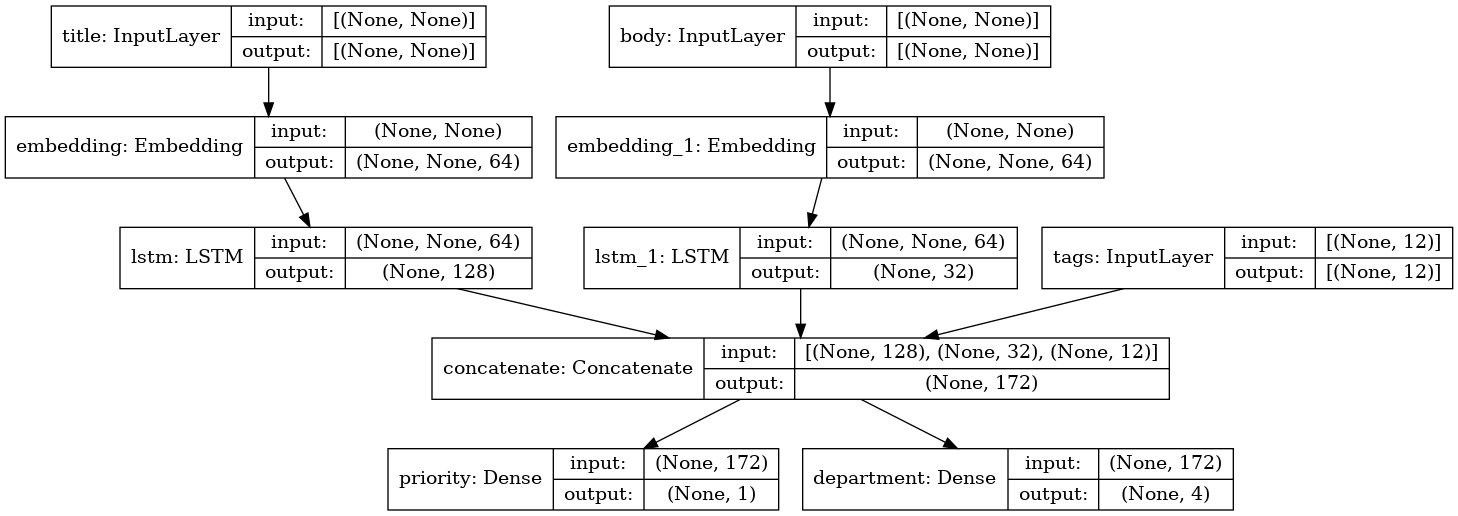

In [ ]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

When compiling this model, you can assign different losses to each output.
You can even assign different weights to each loss -- to modulate
their contribution to the total training loss.

이 모델을 컴파일 할 때 각 출력에 서로 다른 손실을 할당 할 수 있습니다. 각 손실에 다른 가중치를 할당하여 총 교육 손실에 대한 기여도를 조정할 수도 있습니다.

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[
        keras.losses.BinaryCrossentropy(from_logits=True),              # 출력이 두개라
        keras.losses.CategoricalCrossentropy(from_logits=True),
    ],
    loss_weights=[1.0, 0.2],
)

Since the output layers have different names, you could also specify
the losses and loss weights with the corresponding layer names:

In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights={"priority": 1.0, "department": 0.2},
)

Train the model by passing lists of NumPy arrays of inputs and targets:

In [ ]:
# Dummy input data
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")

# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},    # vailation_split이 없음
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2


 1/40 [..............................] - ETA: 2:50 - loss: 1.2763 - priority_loss: 0.7135 - department_loss: 2.8140

 7/40 [====>.........................] - ETA: 0s - loss: 1.2688 - priority_loss: 0.7002 - department_loss: 2.8431  

13/40 [========>.....................] - ETA: 0s - loss: 1.2960 - priority_loss: 0.7305 - department_loss: 2.8276

19/40 [=============>................] - ETA: 0s - loss: 1.3085 - priority_loss: 0.7318 - department_loss: 2.8836

25/40 [=================>............] - ETA: 0s - loss: 1.3002 - priority_loss: 0.7252 - department_loss: 2.8747

31/40 [======================>.......] - ETA: 0s - loss: 1.2881 - priority_loss: 0.7214 - department_loss: 2.8334

37/40 [==========================>...] - ETA: 0s - loss: 1.2910 - priority_loss: 0.7201 - department_loss: 2.8543

40/40 [==============================] - 5s 9ms/step - loss: 1.2899 - priority_loss: 0.7186 - department_loss: 2.8564


Epoch 2/2


 1/40 [..............................] - ETA: 0s - loss: 1.3295 - priority_loss: 0.6904 - department_loss: 3.1959

 7/40 [====>.........................] - ETA: 0s - loss: 1.2623 - priority_loss: 0.6975 - department_loss: 2.8240

13/40 [========>.....................] - ETA: 0s - loss: 1.2591 - priority_loss: 0.6988 - department_loss: 2.8016

19/40 [=============>................] - ETA: 0s - loss: 1.2718 - priority_loss: 0.6985 - department_loss: 2.8663

25/40 [=================>............] - ETA: 0s - loss: 1.2685 - priority_loss: 0.7007 - department_loss: 2.8391

31/40 [======================>.......] - ETA: 0s - loss: 1.2662 - priority_loss: 0.7005 - department_loss: 2.8286

37/40 [==========================>...] - ETA: 0s - loss: 1.2654 - priority_loss: 0.6995 - department_loss: 2.8295

40/40 [==============================] - 0s 9ms/step - loss: 1.2668 - priority_loss: 0.6991 - department_loss: 2.8389


When calling fit with a `Dataset` object, it should yield either a
tuple of lists like `([title_data, body_data, tags_data], [priority_targets, dept_targets])`
or a tuple of dictionaries like
`({'title': title_data, 'body': body_data, 'tags': tags_data}, {'priority': priority_targets, 'department': dept_targets})`.

For more detailed explanation, refer to the [training and evaluation](https://www.tensorflow.org/guide/keras/train_and_evaluate/) guide.

### A toy ResNet model

In addition to models with multiple inputs and outputs,
the functional API makes it easy to manipulate non-linear connectivity
topologies -- these are models with layers that are not connected sequentially,
which the `Sequential` API cannot handle.

A common use case for this is residual connections.
Let's build a toy ResNet model for CIFAR10 to demonstrate this:

장난감 ResNet 모델 (CNN할때 배움)

입력 및 출력이 여러 개인 모델 외에도 함수형 API를 사용하면 비선형 연결 토폴로지를 쉽게 조작할 수 있습니다. 이들은 순차적으로 연결되지 않은 레이어가 있는 모델이며 `Sequential` API가 처리할 수 없는 모델입니다.

이에 대한 일반적인 사용 사례는 나머지 연결(residual connections)입니다. 실례를 위해 CIFAR10을 위한 장난감 ResNet 모델을 만들어 봅시다.

In [ ]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_4 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_5 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_4[0][0]']               
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_5[0][0]']               
                                                                                         

Plot the model:

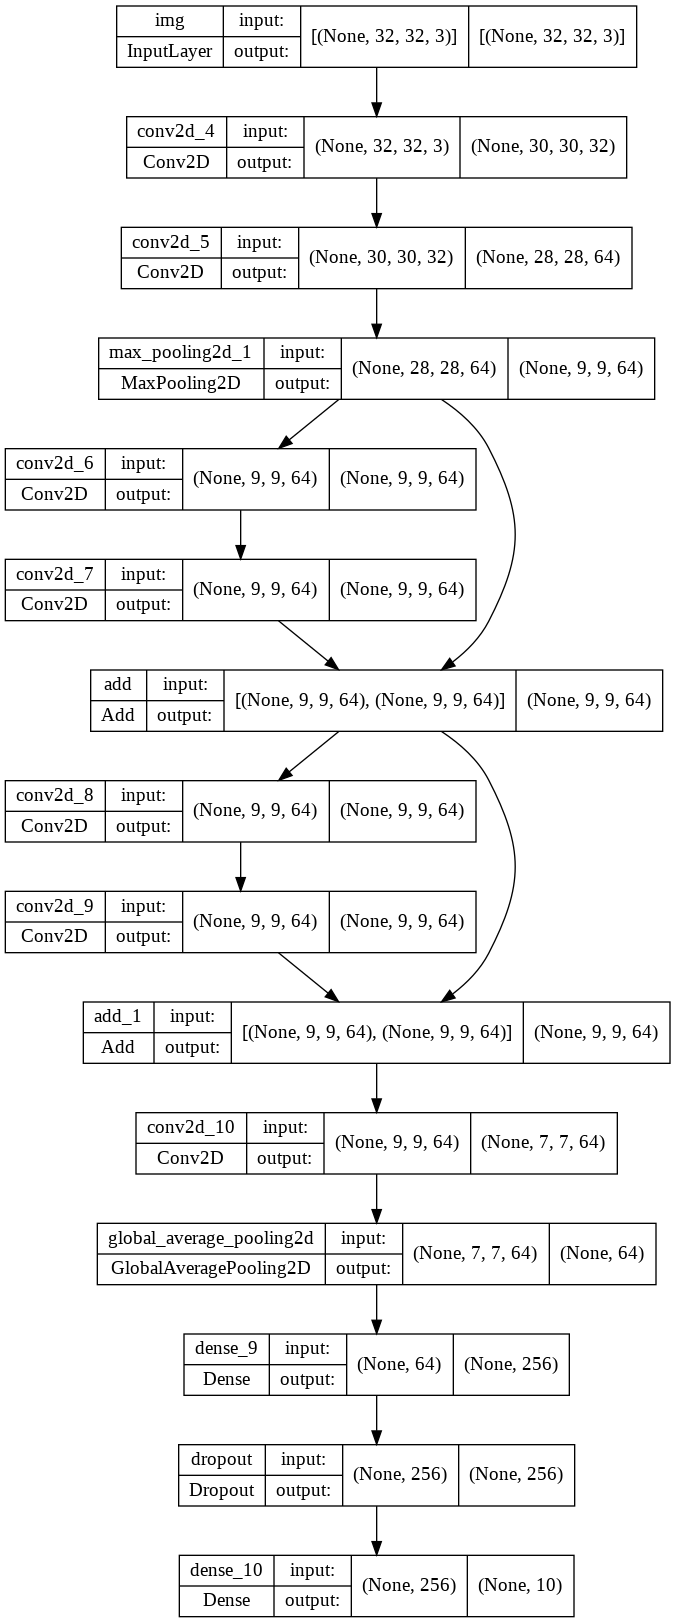

In [ ]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)

Now train the model:

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, 10)     # for use with categorical_crossentropy 이걸못쓰면 Sparecategorical
y_test = keras.utils.to_categorical(y_test, 10)
print(y_train[0])

[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
# We restrict the data to the first 1000 samples so as to limit execution time
# on Colab. Try to train on the entire dataset until convergence!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

# model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, verbose=0, validation_split=0.2) 하면 밑에 과정이 출력안됨

13/13 [==============================] - 7s 396ms/step - loss: 2.3043 - acc: 0.1000 - val_loss: 2.2938 - val_acc: 0.1250


## Shared layers

Another good use for the functional API are models that use *shared layers*.
Shared layers are layer instances that are reused multiple times in the same model --
they learn features that correspond to multiple paths in the graph-of-layers.

Shared layers are often used to encode inputs from similar spaces
(say, two different pieces of text that feature similar vocabulary).
They enable sharing of information across these different inputs,
and they make it possible to train such a model on less data.
If a given word is seen in one of the inputs,
that will benefit the processing of all inputs that pass through the shared layer.

To share a layer in the functional API, call the same layer instance multiple times.
For instance, here's an `Embedding` layer shared across two different text inputs:

In [ ]:
# Embedding for 1000 unique words mapped to 128-dimensional vectors
shared_embedding = layers.Embedding(1000, 128)

# Variable-length sequence of integers
text_input_a = keras.Input(shape=(None,), dtype="int32")

# Variable-length sequence of integers
text_input_b = keras.Input(shape=(None,), dtype="int32")

# Reuse the same layer to encode both inputs
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

## Extract and reuse nodes in the graph of layers

Because the graph of layers you are manipulating is a static data structure,
it can be accessed and inspected. And this is how you are able to plot
functional models as images.

This also means that you can access the activations of intermediate layers
("nodes" in the graph) and reuse them elsewhere --
which is very useful for something like feature extraction.

Let's look at an example. This is a VGG19 model with weights pretrained on ImageNet:

조작하는 레이어의 그래프는 정적 데이터 구조이므로 액세스하여 검사할 수 있습니다. 이를 통해 함수형 모델을 이미지로 플롯할 수 있습니다.

즉, 중간 레이어(그래프의 "노드")의 활성화에 액세스하여 다른 곳에 재사용할 수 있습니다. 이는 특성 추출과 같은 경우에 매우 유용합니다.

예를 봅시다. ImageNet에 가중치가 사전 훈련 된 VGG19 모델입니다.

In [ ]:
vgg19 = tf.keras.applications.VGG19()

574726144/574710816 [==============================] - 7s 0us/step


And these are the intermediate activations of the model,
obtained by querying the graph data structure:

In [ ]:
features_list = [layer.output for layer in vgg19.layers]

Use these features to create a new feature-extraction model that returns
the values of the intermediate layer activations:

In [ ]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

This comes in handy for tasks like
[neural style transfer](https://keras.io/examples/generative/neural_style_transfer/),
among other things.

## Extend the API using custom layers

`tf.keras` includes a wide range of built-in layers, for example:

- Convolutional layers: `Conv1D`, `Conv2D`, `Conv3D`, `Conv2DTranspose`
- Pooling layers: `MaxPooling1D`, `MaxPooling2D`, `MaxPooling3D`, `AveragePooling1D`
- RNN layers: `GRU`, `LSTM`, `ConvLSTM2D`
- `BatchNormalization`, `Dropout`, `Embedding`, etc.

But if you don't find what you need, it's easy to extend the API by creating
your own layers. All layers subclass the `Layer` class and implement:

- `call` method, that specifies the computation done by the layer.
- `build` method, that creates the weights of the layer (this is just a style
convention since you can create weights in `__init__`, as well).

To learn more about creating layers from scratch, read
[custom layers and models](https://www.tensorflow.org/guide/keras/custom_layers_and_models) guide.

The following is a basic implementation of `tf.keras.layers.Dense`:

사용자 정의 레이어를 사용하여 API 확장

`tf.keras` 는 다음과 같은 광범위한 내장 레이어를 포함합니다.

- 컨볼루션 레이어: `Conv1D`, `Conv2D`, `Conv3D`, `Conv2DTranspose`
- 풀링 레이어 : `MaxPooling1D` , `MaxPooling2D` , `MaxPooling3D` , `AveragePooling1D`
- RNN 레이어 : `GRU` , `LSTM` , `ConvLSTM2D`
- `BatchNormalization` , `Dropout` , `Embedding` 등

그러나 필요한 것을 찾지 못하면 자신의 레이어를 만들어 API를 쉽게 확장 할 수 있습니다. 모든 레이어는 `Layer` 클래스를 서브 클래 싱하고 다음을 구현합니다.

- 레이어에 의해 수행되는 계산을 지정하는 `call` 메소드.
- `build` 레이어의 가중치를 생성하는 방법, (당신이 무게를 만들 수 있기 때문에이 단지 스타일의 규칙입니다 `__init__` 뿐만 아니라,).

처음부터 레이어를 만드는 방법에 대한 자세한 내용은 [사용자 정의 레이어 및 모델](https://www.tensorflow.org/guide/keras/custom_layers_and_models) 안내서를 참조하십시오.

다음은 `tf.keras.layers.Dense` 의 기본 구현입니다.

In [ ]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        print("called build method")
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        print("called call method")
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

called build method
called call method


For serialization support in your custom layer, define a `get_config`
method that returns the constructor arguments of the layer instance:

In [ ]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):
        return {"units": self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={"CustomDense": CustomDense})

Optionally, implement the class method `from_config(cls, config)` which is used
when recreating a layer instance given its config dictionary.
The default implementation of `from_config` is:

```python
def from_config(cls, config):
  return cls(**config)
```

## When to use the functional API

Should you use the Keras functional API to create a new model,
or just subclass the `Model` class directly? In general, the functional API
is higher-level, easier and safer, and has a number of
features that subclassed models do not support.

However, model subclassing provides greater flexibility when building models
that are not easily expressible as directed acyclic graphs of layers.
For example, you could not implement a Tree-RNN with the functional API
and would have to subclass `Model` directly.

For an in-depth look at the differences between the functional API and
model subclassing, read
[What are Symbolic and Imperative APIs in TensorFlow 2.0?](https://blog.tensorflow.org/2019/01/what-are-symbolic-and-imperative-apis.html).

언제 Keras 함수형 API를 사용하여 새 모델을 작성하거나 `Model` 클래스를 직접 하위 클래스화해야 할까요? 일반적으로, 함수형 API는 고수준의 쉽고 안전하며, 하위 클래스화되지 않은 모델에서 지원하지 않는 많은 특성을 가지고 있습니다.

그러나 모델 하위 클래스화는 레이어의 방향성 비순환 그래프로 쉽게 표현할 수 없는 모델을 빌드할 때 더 큰 유연성을 제공합니다. 예를 들어, 함수형 API로 Tree-RNN을 구현할 수 없었으며 `Model`을 직접 하위 클래스화해야 했습니다.

함수형 API와 모델 하위 클래스화의 차이점에 대한 자세한 내용은 [TensorFlow 2.0의 기호 및 명령형 API란 무엇입니까?](https://blog.tensorflow.org/2019/01/what-are-symbolic-and-imperative-apis.html)를 참조하세요.

### Functional API strengths:

The following properties are also true for Sequential models
(which are also data structures), but are not true for subclassed models
(which are Python bytecode, not data structures).

다음 특성은 Sequential 모델(데이터 구조이기도 함)에도 적용되지만, 하위 클래스화된 모델(데이터 구조가 아닌 파이썬 바이트 코드)에는 적용되지 않습니다.

#### Less verbose (덜 복잡하다)

There is no `super(MyClass, self).__init__(...)`, no `def call(self, ...):`, etc.

Compare:

```python
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)
```

With the subclassed version:

```python
class MLP(keras.Model):

  def __init__(self, **kwargs):
    super(MLP, self).__init__(**kwargs)
    self.dense_1 = layers.Dense(64, activation='relu')
    self.dense_2 = layers.Dense(10)

  def call(self, inputs):
    x = self.dense_1(inputs)
    return self.dense_2(x)

# Instantiate the model.
mlp = MLP()
# Necessary to create the model's state.
# The model doesn't have a state until it's called at least once.
_ = mlp(tf.zeros((1, 32)))
```

#### Model validation while defining its connectivity graph

In the functional API, the input specification (shape and dtype) is created
in advance (using `Input`). Every time you call a layer,
the layer checks that the specification passed to it matches its assumptions,
and it will raise a helpful error message if not.

This guarantees that any model you can build with the functional API will run.
All debugging -- other than convergence-related debugging --
happens statically during the model construction and not at execution time.
This is similar to type checking in a compiler.

함수형 API에서는 입력 사양(형상 및 dtype)이 사전에 작성됩니다 (`Input` 사용). 레이어를 호출할 때마다 레이어는 전달된 사양이 해당 가정과 일치하는지 확인하고 그렇지 않은 경우 유용한 오류 메시지를 발생시킵니다.

이를 통해 함수형 API로 빌드할 수 있는 모든 모델이 실행됩니다. 수렴 관련 디버깅 이외의 모든 디버깅은 실행 중이 아니라 모델 구성 중에 정적으로 발생합니다. 이것은 컴파일러에서의 유형 검사와 유사합니다.

#### A functional model is plottable and inspectable

You can plot the model as a graph, and you can easily access intermediate nodes
in this graph. For example, to extract and reuse the activations of intermediate
layers (as seen in a previous example):

모델을 그래프로 플롯하고, 이 그래프에서 중간 노드에 쉽게 액세스할 수 있습니다. 예를 들어, 중간 레이어의 활성화를 추출하여 재사용합니다(이전 예제에서 볼 수 있음).

```python
features_list = [layer.output for layer in vgg19.layers]
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)
```

#### A functional model can be serialized or cloned

Because a functional model is a data structure rather than a piece of code,
it is safely serializable and can be saved as a single file
that allows you to recreate the exact same model
without having access to any of the original code.
See the [serialization & saving guide](https://www.tensorflow.org/guide/keras/save_and_serialize/).

To serialize a subclassed model, it is necessary for the implementer
to specify a `get_config()`
and `from_config()` method at the model level.

함수형 모델은 코드가 아닌 데이터 구조이기 때문에 안전하게 직렬화할 수 있으며 단일 코드로 저장하여 원본 코드에 액세스하지 않고도 정확히 같은 모델을 다시 만들 수 있습니다. [직렬화 및 저장 안내서](https://www.tensorflow.org/guide/keras/save_and_serialize/)를 참조하세요.

하위 클래스화된 모델을 직렬화하려면 구현자가 모델 레벨에서 `get_config()` 및 `from_config()` 메서드를 지정해야 합니다.

### Functional API weakness:

#### It does not support dynamic architectures

The functional API treats models as DAGs of layers.
This is true for most deep learning architectures, but not all -- for example,
recursive networks or Tree RNNs do not follow this assumption and cannot
be implemented in the functional API.

동적 아키텍처를 지원하지 않는다

함수형 API는 모델을 레이어의 DAG로 취급합니다. 이는 대부분의 딥 러닝 아키텍처에 해당하지만, 전부는 아닙니다. 예를 들어, 재귀 네트워크 또는 트리 RNN은 이 가정을 따르지 않으며 함수형 API로 구현할 수 없습니다.

## Mix-and-match API styles

Choosing between the functional API or Model subclassing isn't a
binary decision that restricts you into one category of models.
All models in the `tf.keras` API can interact with each other, whether they're
`Sequential` models, functional models, or subclassed models that are written
from scratch.

You can always use a functional model or `Sequential` model
as part of a subclassed model or layer:

믹스 앤 매치 API 스타일

함수형 API 또는 Model 하위 클래스화 중에서 선택하는 것은 하나의 모델 범주로 제한하는 이진 결정이 아닙니다. `tf.keras` API의 모든 모델은 `Sequential` 모델, 함수형 모델 또는 처음부터 작성한 하위 클래스화된 모델과 관계없이 서로 상호 작용할 수 있습니다.

하위 클래스화된 모델 또는 레이어의 일부로 함수형 모델 또는 `Sequential` 모델을 항상 사용할 수 있습니다.

In [ ]:
units = 32
timesteps = 10
input_dim = 5

# Define a Functional model
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        # Our previously-defined Functional model
        self.classifier = model

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)


rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)


You can use any subclassed layer or model in the functional API
as long as it implements a `call` method that follows one of the following patterns:

- `call(self, inputs, **kwargs)` --
Where `inputs` is a tensor or a nested structure of tensors (e.g. a list of tensors),
and where `**kwargs` are non-tensor arguments (non-inputs).
- `call(self, inputs, training=None, **kwargs)` --
Where `training` is a boolean indicating whether the layer should behave
in training mode and inference mode.
- `call(self, inputs, mask=None, **kwargs)` --
Where `mask` is a boolean mask tensor (useful for RNNs, for instance).
- `call(self, inputs, training=None, mask=None, **kwargs)` --
Of course, you can have both masking and training-specific behavior at the same time.

Additionally, if you implement the `get_config` method on your custom Layer or model,
the functional models you create will still be serializable and cloneable.

Here's a quick example of a custom RNN, written from scratch,
being used in a functional model:

다음 패턴 중 하나를 따르는 `call` 메서드를 구현하는 한 함수형 API에서 하위 클래스화된 레이어 또는 모델을 사용할 수 있습니다.

- `call(self, inputs, **kwargs)` - `inputs`는 텐서 또는 텐서의 중첩 구조(예: 텐서의 목록)이며, `**kwargs`는 비 텐서 인수(non-inputs)입니다.
- `call(self, inputs, training=None, **kwargs)` - `training`은 레이어가 훈련 모드 및 추론 모드에서 동작해야 하는지 여부를 나타내는 boolean입니다.
- `call(self, inputs, mask=None, **kwargs)` - `mask`는 boolean 마스크 텐서(예를 들어, RNN에 유용)입니다.
- `call(self, inputs, training=None, mask=None, **kwargs)` -물론 마스킹과 교육 별 동작을 동시에 가질 수 있습니다.

또한, 사용자 정의 Layer 또는 모델에서 `get_config` 메서드를 구현하면 작성하는 함수형 모델은 계속 직렬화 가능하고 복제 가능합니다.

다음은 함수형 모델에 사용되는 처음부터 작성된 사용자 정의 RNN의 간단한 예입니다.

In [ ]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = layers.Dense(1)

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        return self.classifier(features)


# Note that you specify a static batch size for the inputs with the `batch_shape`
# arg, because the inner computation of `CustomRNN` requires a static batch size
# (when you create the `state` zeros tensor).
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))